In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train = train[:10000]

In [4]:
# data segmentation
X = train.drop(['target','id'], axis=1)
y = train['target']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0) # train, valid 8:2 분할

In [5]:
# We need to duplicate the original state of our training data and test data.
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

# Functions that return training data and test data
def load_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()
    return train_x, test_x

In [6]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [7]:
train.isnull().sum()

id        0
f_00      0
f_01      0
f_02      0
f_03      0
f_04      0
f_05      0
f_06      0
f_07      0
f_08      0
f_09      0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
target    0
dtype: int64

In [8]:
train_x.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['min'], cmap='Reds')\
                            .background_gradient(subset=['max'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
f_00,8000.000000,-0.000261,1.011958,-3.901018,-0.677421,0.002640,0.665937,4.299185
f_01,8000.000000,-0.006177,0.995587,-3.770678,-0.691798,-0.017681,0.657043,3.653854
f_02,8000.000000,0.005250,1.002745,-3.545416,-0.668942,0.007566,0.674878,3.539400
f_03,8000.000000,0.009752,0.992412,-4.083185,-0.673185,0.016078,0.676711,3.750555
f_04,8000.000000,0.004033,1.001090,-4.064526,-0.686248,0.009555,0.692593,3.397669
f_05,8000.000000,-0.005107,0.984499,-3.496902,-0.676850,-0.000669,0.655968,4.383716
f_06,8000.000000,0.002452,0.996065,-3.638403,-0.655465,0.001614,0.667735,3.398618
f_07,8000.000000,2.026125,1.653794,0.000000,1.000000,2.000000,3.000000,10.000000
f_08,8000.000000,2.050250,1.583047,0.000000,1.000000,2.000000,3.000000,10.000000
f_09,8000.000000,2.389625,1.647849,0.000000,1.000000,2.000000,3.000000,10.000000


In [9]:
num_cols = [ 'f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18','f_29', 'f_30']

In [10]:
# Load Data
train_x, test_x = load_data()

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
scaler = StandardScaler()
scaler.fit(train_x[num_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
StandardScaler()

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
# Permuting each column after normalization
train_x[num_cols] = scaler.transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])

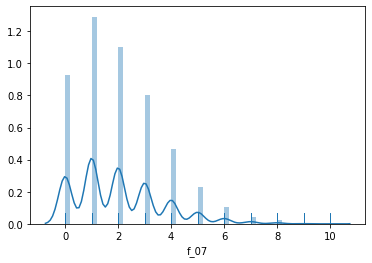

In [15]:
## Before ormalization 

sns.distplot(train['f_07'],rug=True)
plt.show()

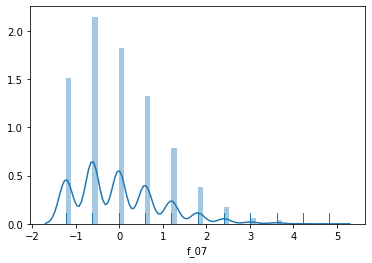

In [17]:
## After ormalization 

sns.distplot(train_x['f_07'],rug=True)
plt.show()

In [18]:
train_x, test_x = load_data()

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# Normalize training data and test data respectively (bad example)
scaler_train = StandardScaler()
scaler_train.fit(train_x[num_cols])
train_x[num_cols] = scaler_train.transform(train_x[num_cols])

scaler_test = StandardScaler()
scaler_test.fit(test_x[num_cols])
test_x[num_cols] = scaler_test.transform(test_x[num_cols])

In [21]:
train_x, test_x = load_data()

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x[num_cols])


MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
train_x[num_cols] = scaler.transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])

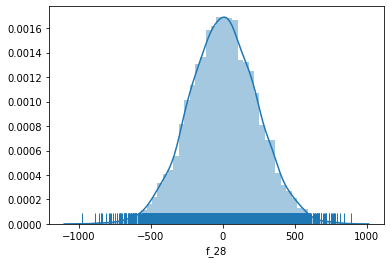

In [26]:
## After ormalization 

sns.distplot(train_x['f_28'],rug=True)
plt.show()

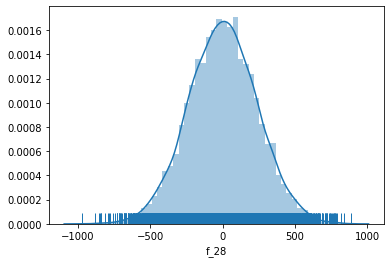

In [27]:
## After ormalization 

sns.distplot(train['f_28'],rug=True)
plt.show()

In [28]:
train_x, test_x = load_data()

In [29]:
from sklearn.preprocessing import PowerTransformer

In [30]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(train_x[num_cols])

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [31]:
# 변환 후의 데이터로 각 열을 치환
train_x[num_cols] = pt.transform(train_x[num_cols])
test_x[num_cols] = pt.transform(test_x[num_cols])

In [32]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train.f_28,
    xbins=dict( # bins used for histogram
        start=-1000,
        end=1000
    ),
    marker_color='blue',
    opacity=1
))

fig.update_layout(
    title_text='f_28 yeo-johnson Before',
    xaxis_title_text='f_28',
    yaxis_title_text='Value', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [33]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train_x.f_28,
    xbins=dict( # bins used for histogram
        start=-1000,
        end=1000

    ),
    marker_color='blue',
    opacity=1
))

fig.update_layout(
    title_text='f_28 yeo-johnson After',
    xaxis_title_text='f_28',
    yaxis_title_text='Value', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [34]:
train_x, test_x = load_data()

In [35]:
# Check 1%, 99% points of training data per column
p01 = train_x[num_cols].quantile(0.01)
p99 = train_x[num_cols].quantile(0.99)

p01
p99

f_07    7.00
f_08    7.00
f_09    7.00
f_10    7.00
f_11    6.01
f_12    8.00
f_13    6.00
f_14    6.00
f_15    7.00
f_16    6.00
f_17    6.00
f_18    6.00
f_29    1.00
f_30    2.00
Name: 0.99, dtype: float64

In [36]:
# Values ​​below 1% point are clipped to 1% point, and values ​​above 99% point are clipped to 99% point.
train_x[num_cols] = train_x[num_cols].clip(p01, p99, axis=1)
test_x[num_cols] = test_x[num_cols].clip(p01, p99, axis=1)

In [37]:
after_f_03 = train_x['f_03']
before_f_03 = train['f_03']

after_f_05 = train_x['f_05']
before_f_05 = train['f_05']

In [38]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = before_f_03,
    xbins=dict( # bins used for histogram
        start=0,
        end=200,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='f_03 Clipping Before',
    xaxis_title_text='f_03',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [39]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = after_f_03,
    xbins=dict( # bins used for histogram
        start=0,
        end=200
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='f_06 Clipping After',
    xaxis_title_text='f_06',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()


## 0~80까지의 값들이 치환 되었다.

In [40]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = before_f_05,
    xbins=dict( # bins used for histogram
        start=-1,
        end=1,
        size=1
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='f_05 Clipping Before',
    xaxis_title_text='f_05',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [41]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = after_f_05,
    xbins=dict( # bins used for histogram
        start=0,
        end=560,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='f_05 Clipping After',
    xaxis_title_text='f_05',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [42]:
train_x, test_x = load_data()

from sklearn.preprocessing import QuantileTransformer

In [43]:
transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
transformer.fit(train_x[num_cols])

QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=100,
                    output_distribution='normal', random_state=0,
                    subsample=100000)

In [44]:
train_x[num_cols] = transformer.transform(train_x[num_cols])
test_x[num_cols] = transformer.transform(test_x[num_cols])

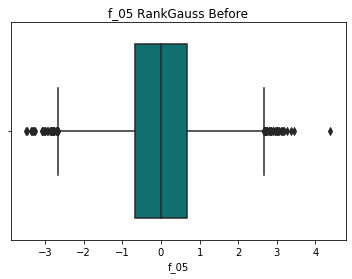

In [45]:
p = sns.boxplot(x=train.f_05, color = 'teal')
p.set_title("f_05 RankGauss Before")
plt.show()

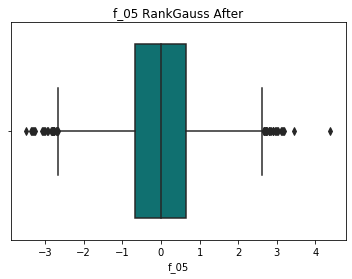

In [46]:
p = sns.boxplot(x=train_x.f_05, color = 'teal')
p.set_title("f_05 RankGauss After")
plt.show()